## エルボー法
- クラスタ内距離平方和をクラスタ数  K  毎にプロットして、もっとも良さそうな  K  を決定する

### データの作成

In [6]:
import numpy
import pandas

from matplotlib import pyplot
import japanize_matplotlib
from sklearn.datasets import make_blobs

%matplotlib inline

X, y = make_blobs(n_samples=200, centers=4, n_features=2, cluster_std=2.0, random_state=42)

### クラスタ内距離平方和のプロット

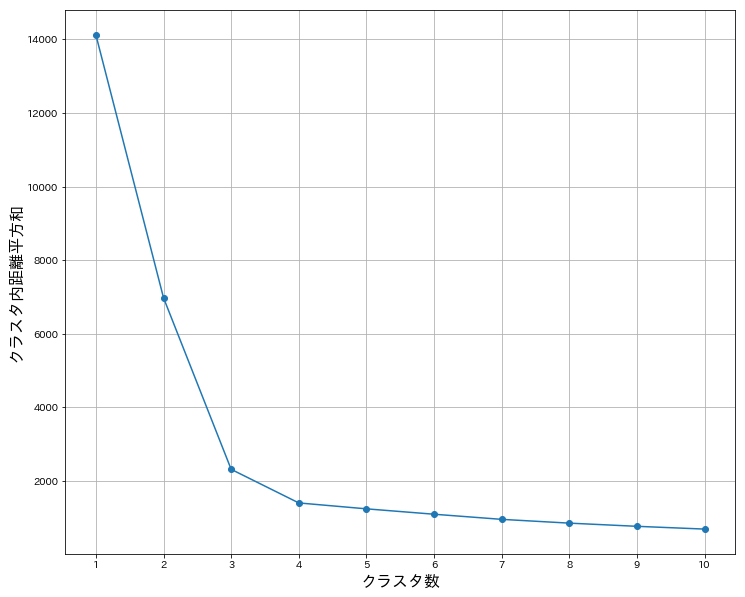

In [7]:
from sklearn.cluster import KMeans

inertia = []
# K  を 1 から 10 まで動かして、k-means を学習し、クラスタ内距離平方和をプロット。
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    # クラスタ内距離平方和を保存しておく
    inertia.append(kmeans.inertia_)

# 保存しておいたクラスタ内距離平方和をプロット

pyplot.figure(figsize=(12, 10))
pyplot.plot(range(1, 11), inertia, marker='o')
pyplot.xticks(range(1, 11))
pyplot.xlabel('クラスタ数', fontsize=16)
pyplot.ylabel('クラスタ内距離平方和', fontsize=16)
pyplot.grid()
pyplot.show()

In [8]:
# 肘部分が4の為K = 4となる

## シルエット分析
- 各サンプルがどの程度密に集まっているかを可視化して最適なクラスタ数  K  を求め

In [9]:
# scikit-learn からシルエット係数を計算するための関数 silhouette_samples() と silhouette_score() を import
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm #プロットに利用するカラーモジュール

For n_clusters = 2 The average silhouette_score is : 0.5412312762397167
For n_clusters = 3 The average silhouette_score is : 0.6496589475200517
For n_clusters = 4 The average silhouette_score is : 0.5932035310368007
For n_clusters = 5 The average silhouette_score is : 0.5042417843603687
For n_clusters = 6 The average silhouette_score is : 0.4637250816273483


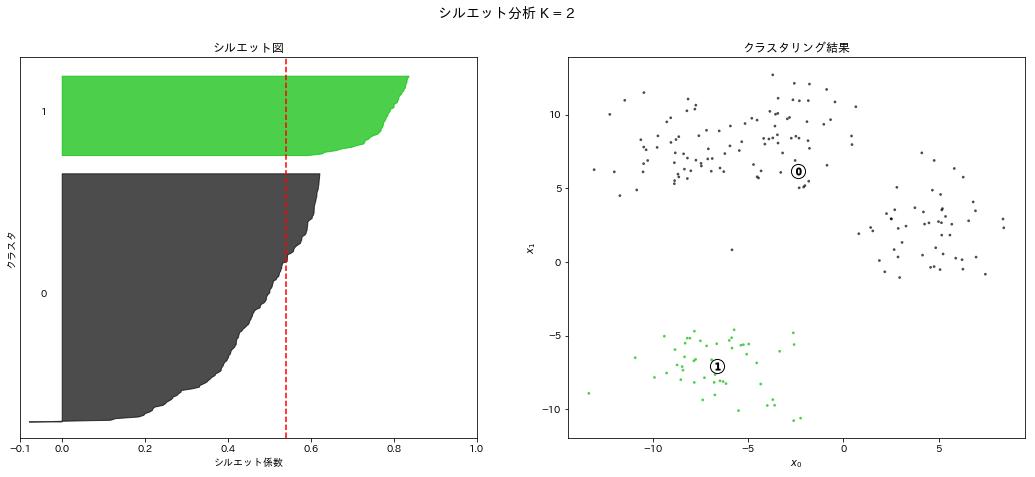

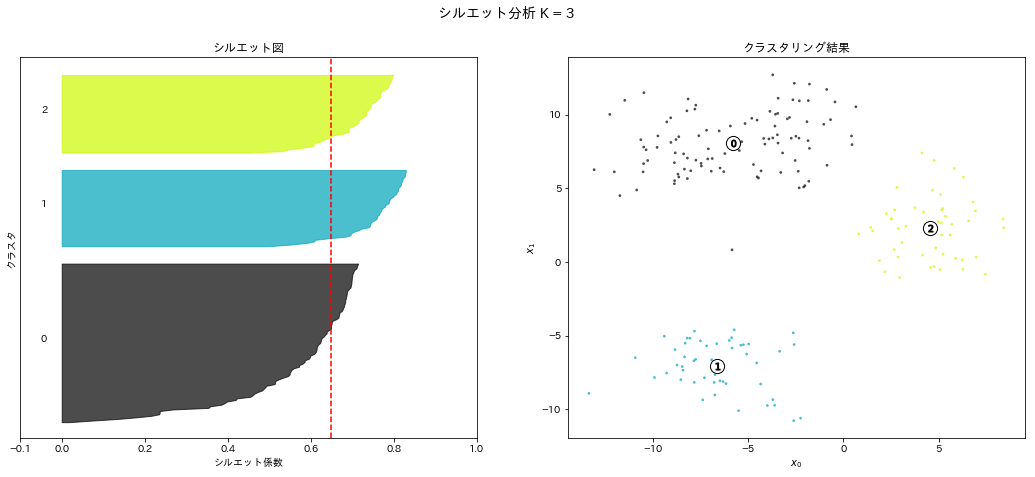

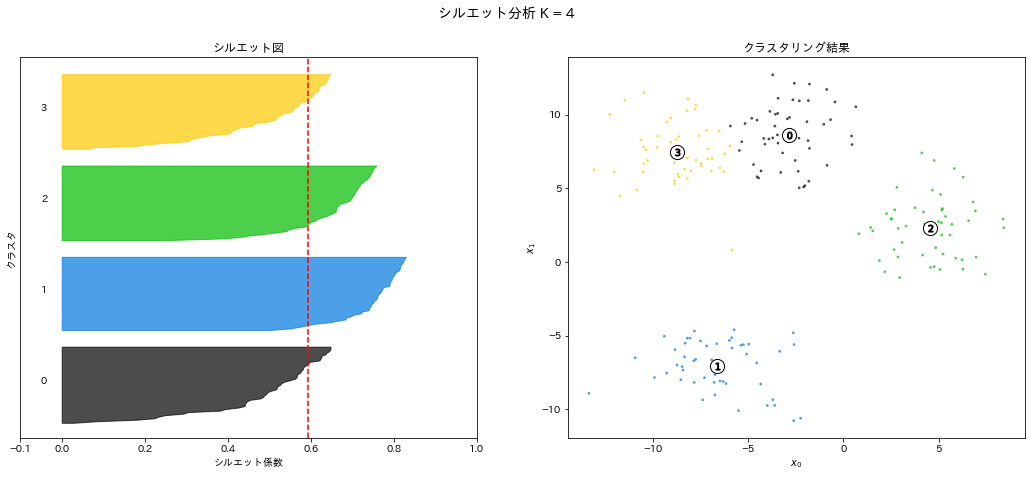

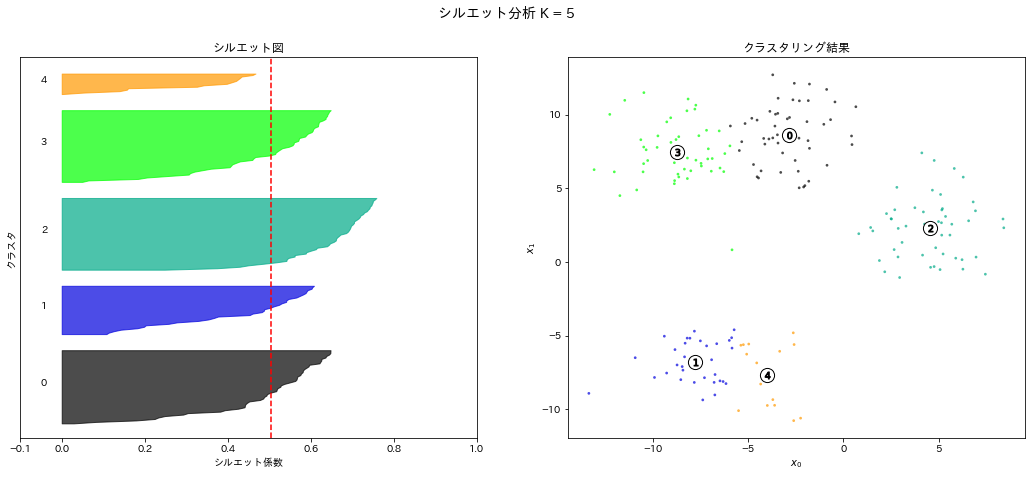

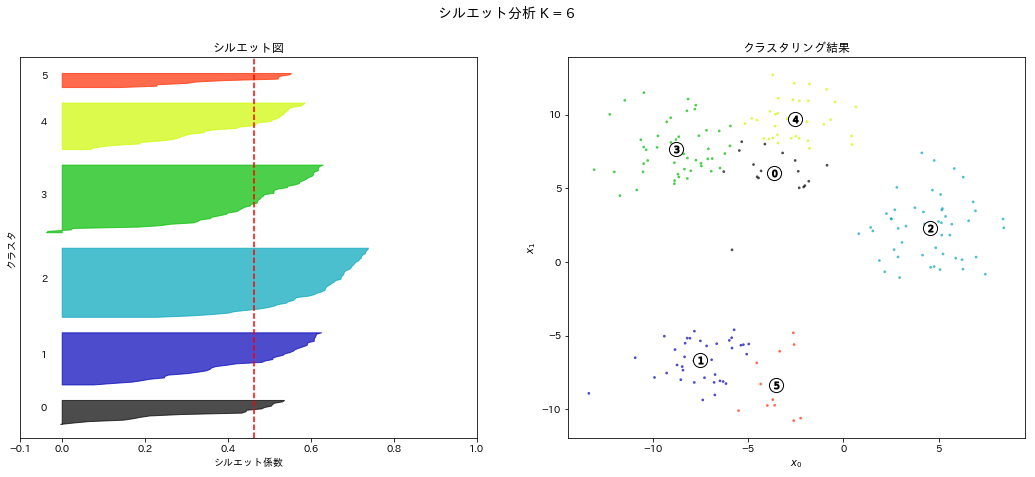

In [15]:
range_n_clusters = [2, 3, 4, 5, 6]  # クラスタ数の範囲

for n_clusters in range_n_clusters:  # 各クラスタ数について
    # シルエット図とクラスタリング結果の2つをプロットするための設定
    fig, (ax1, ax2) = pyplot.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # シルエット図をプロットするための領域の設定
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # k-means を実行する
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # シルエット係数の平均を計算する
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 各サンプルについてシルエット係数を計算する
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):  # 各クラスタについて
        # 同じクラスタ内のシルエット係数を集める
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # 昇順にソートする
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i  # プロット範囲の y軸 の計算

        color = cm.nipy_spectral(float(i) / n_clusters)  # クラスタの色を決める
        # シルエットをプロットする
        ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # シルエット図に付けるラベル
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 次のクラスタのシルエット図の y軸 の開始点を計算する
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("シルエット図")
    ax1.set_xlabel("シルエット係数")
    ax1.set_ylabel("クラスタ")

    # シルエット係数の平均値を赤色の破線で引く
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # y軸の目盛設定
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # x軸の目盛設定

    # クラスタリング結果をプロットするための領域設定
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    # データのプロット
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # セントロイドのプロット
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    # セントロイドにクラスタインデックスを付与する
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("クラスタリング結果")
    ax2.set_xlabel(r"$x_{0}$")
    ax2.set_ylabel(r"$x_{1}$")

    pyplot.suptitle(("シルエット分析 K = %d" % n_clusters), fontsize=14, fontweight='bold')

pyplot.show()

### よいクラスタ数は
- シルエットの厚み（y軸方向の幅）がどれも同じ
- 平均値（赤色の破線）より右側にあるサンプルが多い
- 全てのシルエットが同じような形になってる